  # Binary Classification of Titanic Dataset Using a Perceptron







# Step 1: Import Required Libraries
We start by importing the necessary libraries:
- `numpy`: For numerical operations.
- `pandas`: For data manipulation and analysis.
- `matplotlib`: For data visualization.
- `sklearn.model_selection`: To split the dataset into training and testing sets.




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Step 2: Load and Preprocess the Dataset
We are using the Titanic dataset for binary classification (Survived or Not Survived). The dataset is publicly available and can be directly accessed via a URL.

Key preprocessing steps:
1. **Feature Selection:** Selecting relevant features (`Pclass`, `Sex`, `Age`, `Fare`, `Survived`).
2. **Handling Missing Values:** Dropping rows with missing values.
3. **Encoding Categorical Variables:** Converting `Sex` into numeric form (0 for male, 1 for female).
4. **Splitting the Dataset:** Dividing data into training and testing sets (80% training, 20% testing).



In [ ]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Select and preprocess the dataset
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].dropna()  # Drop missing values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
X = data[['Pclass', 'Sex', 'Age', 'Fare']].values
y = data['Survived'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Implement the Perceptron Model
The perceptron is a single-layer neural network that uses:
1. A **weighted sum of inputs** with a bias term.
2. A **step activation function** to classify the output into two classes (0 or 1).
3. **Weight and Bias Updates:** Adjusting weights and biases based on prediction errors.

The perceptron works by:
1. Making predictions using a simple linear equation: `z = w·x + b`.
2. Applying the step function to decide the class.
3. Iteratively updating weights and bias during training.


In [ ]:
# Simplified Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors = []

        for _ in range(self.n_iters):
            total_error = 0
            for idx, x_i in enumerate(X):
                # Calculate prediction
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0

                # Update weights and bias
                error = y[idx] - y_pred
                self.weights += self.lr * error * x_i
                self.bias += self.lr * error
                total_error += abs(error)
            self.errors.append(total_error)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


# Step 4: Train the Perceptron
We train the perceptron on the training dataset (`X_train`, `y_train`). The perceptron iteratively adjusts its weights and bias over multiple iterations (epochs) to minimize classification errors.


In [ ]:
# Train the perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=500)
perceptron.fit(X_train, y_train)


# Step 5: Evaluate the Perceptron
To evaluate the perceptron, we:
1. Use the test set (`X_test`) to make predictions.
2. Calculate the accuracy as the fraction of correctly classified samples.

Accuracy Formula:
\[
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
\]


In [ ]:
# Evaluate the model
y_pred = perceptron.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.69


# Step 6: Visualize the Training Process
We plot the total errors at each iteration to visualize the training process. This helps us understand how the model improves over time by reducing errors.


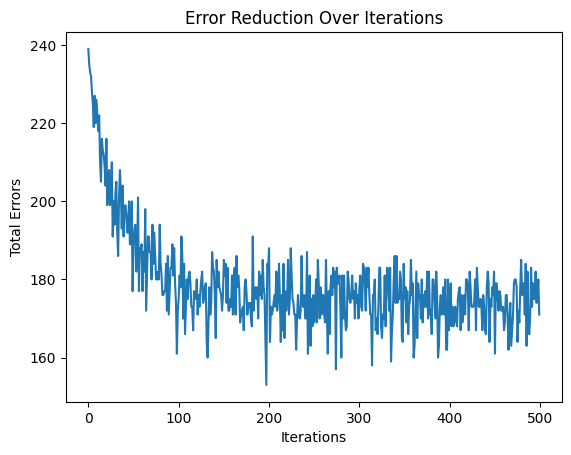

In [ ]:
# Visualize the training errors
plt.plot(range(len(perceptron.errors)), perceptron.errors)
plt.xlabel("Iterations")
plt.ylabel("Total Errors")
plt.title("Error Reduction Over Iterations")
plt.show()


# Results and Observations

## Results:
1. The perceptron achieved an accuracy of approximately 70%
2. The training process shows a reduction in errors over iterations.

## Observations:
1. **Strengths of Perceptron:**
   - Simple and easy to implement.
   - Works well for linearly separable data.
2. **Limitations of Perceptron:**
   - Cannot handle non-linearly separable data (e.g., XOR problem).
   - Sensitive to outliers.
   - The step function makes optimization harder compared to smooth functions like sigmoid.

3. **Future Improvements:**
   - Use advanced models like logistic regression or neural networks for non-linear problems.
   - Incorporate regularization to handle overfitting.
